In [1]:
! wget -O Data.zip https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/zkwgkjkjn9-2.zip

--2023-12-09 15:53:16--  https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/zkwgkjkjn9-2.zip
Resolving prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com)... 52.218.122.98, 52.92.21.10, 3.5.69.159, ...
Connecting to prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com)|52.218.122.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2838895384 (2.6G) [application/zip]
Saving to: ‘Data.zip’

Data.zip            100%[===================>]   2.64G  39.0MB/s    in 74s     

2023-12-09 15:54:30 (36.5 MB/s) - ‘Data.zip’ saved [2838895384/2838895384]



In [2]:
! unzip "/content/Data.zip"
! mv "/content/zkwgkjkjn9-2" "/content/Data"
! rm Data.zip

Archive:  /content/Data.zip
  inflating: zkwgkjkjn9-2/Gas Sensors Measurements/Gas_Sensors_Measurements.csv  
  inflating: zkwgkjkjn9-2/Thermal Camera Images/Mixture.zip  
  inflating: zkwgkjkjn9-2/Thermal Camera Images/NoGas.zip  
  inflating: zkwgkjkjn9-2/Thermal Camera Images/Perfume.zip  
  inflating: zkwgkjkjn9-2/Thermal Camera Images/Smoke.zip  
  inflating: zkwgkjkjn9-2/Thermal Camera Images/Sample Thermal Camera Images/Mixture/10_Mixture.png  
  inflating: zkwgkjkjn9-2/Thermal Camera Images/Sample Thermal Camera Images/Mixture/18_Mixture.png  
  inflating: zkwgkjkjn9-2/Thermal Camera Images/Sample Thermal Camera Images/Mixture/11_Mixture.png  
  inflating: zkwgkjkjn9-2/Thermal Camera Images/Sample Thermal Camera Images/Mixture/13_Mixture.png  
  inflating: zkwgkjkjn9-2/Thermal Camera Images/Sample Thermal Camera Images/Mixture/14_Mixture.png  
  inflating: zkwgkjkjn9-2/Thermal Camera Images/Sample Thermal Camera Images/Mixture/16_Mixture.png  
  inflating: zkwgkjkjn9-2/Thermal 

In [3]:
! unzip "/content/Data/Thermal Camera Images/*.zip" -d "/content/Data/Images"
!  rm -r "/content/Data/Thermal Camera Images/Sample Thermal Camera Images"

Streaming output truncated to the last 5000 lines.
  inflating: /content/Data/Images/828_Smoke.png  
  inflating: /content/Data/Images/829_Smoke.png  
 extracting: /content/Data/Images/82_Smoke.png  
  inflating: /content/Data/Images/830_Smoke.png  
  inflating: /content/Data/Images/831_Smoke.png  
  inflating: /content/Data/Images/832_Smoke.png  
 extracting: /content/Data/Images/833_Smoke.png  
  inflating: /content/Data/Images/834_Smoke.png  
 extracting: /content/Data/Images/835_Smoke.png  
  inflating: /content/Data/Images/836_Smoke.png  
 extracting: /content/Data/Images/837_Smoke.png  
  inflating: /content/Data/Images/838_Smoke.png  
  inflating: /content/Data/Images/839_Smoke.png  
 extracting: /content/Data/Images/83_Smoke.png  
  inflating: /content/Data/Images/840_Smoke.png  
  inflating: /content/Data/Images/841_Smoke.png  
  inflating: /content/Data/Images/842_Smoke.png  
 extracting: /content/Data/Images/843_Smoke.png  
 extracting: /content/Data/Images/844_Smoke.png  
 

In [ ]:
# ! ls "/content/Data/Images"

# Introduction

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [5]:
df = pd.read_csv('/content/Data/Gas Sensors Measurements/Gas_Sensors_Measurements.csv')
df

,Serial Number,MQ2,MQ3,MQ5,MQ6,MQ7,MQ8,MQ135,Gas,Corresponding Image Name
0,0,555,515,377,338,666,451,416,NoGas,0_NoGas
1,1,555,516,377,339,666,451,416,NoGas,1_NoGas
2,2,556,517,376,337,666,451,416,NoGas,2_NoGas
3,3,556,516,376,336,665,451,416,NoGas,3_NoGas
4,4,556,516,376,337,665,451,416,NoGas,4_NoGas
...,...,...,...,...,...,...,...,...,...,...
6395,1595,658,445,455,414,491,321,436,Mixture,1595_Mixture
6396,1596,650,444,451,411,486,317,431,Mixture,1596_Mixture
6397,1597,630,443,446,407,474,312,429,Mixture,1597_Mixture
6398,1598,632,443,444,405,471,309,430,Mixture,1598_Mixture


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Serial Number             6400 non-null   int64 
 1   MQ2                       6400 non-null   int64 
 2   MQ3                       6400 non-null   int64 
 3   MQ5                       6400 non-null   int64 
 4   MQ6                       6400 non-null   int64 
 5   MQ7                       6400 non-null   int64 
 6   MQ8                       6400 non-null   int64 
 7   MQ135                     6400 non-null   int64 
 8   Gas                       6400 non-null   object
 9   Corresponding Image Name  6400 non-null   object
dtypes: int64(8), object(2)
memory usage: 500.1+ KB


In [7]:
df.describe()

,Serial Number,MQ2,MQ3,MQ5,MQ6,MQ7,MQ8,MQ135
count,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000
mean,799.500000,677.593438,462.024688,404.579063,399.758750,565.952031,542.473750,416.727031
std,461.916214,92.913955,70.284038,55.672249,45.091353,83.133693,151.020217,76.681407
min,0.000000,502.000000,337.000000,291.000000,311.000000,361.000000,220.000000,275.000000
25%,399.750000,591.000000,405.000000,366.000000,366.000000,524.000000,447.000000,354.000000
50%,799.500000,701.000000,486.000000,400.000000,393.000000,576.000000,576.000000,437.000000
75%,1199.250000,756.000000,529.000000,443.000000,426.000000,629.000000,642.000000,473.000000
max,1599.000000,824.000000,543.000000,596.000000,524.000000,796.000000,794.000000,589.000000


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, _, _ = train_test_split(
     df, df["Gas"], test_size=0.2, random_state=0, stratify = df["Gas"])

In [10]:
X_train

,Serial Number,MQ2,MQ3,MQ5,MQ6,MQ7,MQ8,MQ135,Gas,Corresponding Image Name
1864,264,740,525,451,453,674,721,483,Perfume,264_Perfume
6229,1429,694,456,486,446,557,380,457,Mixture,1429_Mixture
2162,562,785,531,483,482,683,746,503,Perfume,562_Perfume
4058,858,699,365,394,399,574,642,351,Smoke,858_Smoke
4010,810,559,361,313,355,576,554,285,Smoke,810_Smoke
...,...,...,...,...,...,...,...,...,...,...
5704,904,663,416,457,431,540,508,455,Mixture,904_Mixture
4339,1139,662,379,323,355,584,598,322,Smoke,1139_Smoke
3437,237,534,349,337,373,562,546,278,Smoke,237_Smoke
2216,616,730,529,391,391,585,569,446,Perfume,616_Perfume


In [11]:
X_test

,Serial Number,MQ2,MQ3,MQ5,MQ6,MQ7,MQ8,MQ135,Gas,Corresponding Image Name
2920,1320,717,534,368,356,466,444,475,Perfume,1320_Perfume
2851,1251,726,534,373,361,477,459,480,Perfume,1251_Perfume
6289,1489,654,438,446,405,481,319,425,Mixture,1489_Mixture
4923,123,521,383,355,328,402,226,338,Mixture,123_Mixture
4166,966,732,368,356,367,578,586,302,Smoke,966_Smoke
...,...,...,...,...,...,...,...,...,...,...
279,279,779,528,479,466,662,663,474,NoGas,279_NoGas
5822,1022,663,438,462,423,511,354,436,Mixture,1022_Mixture
1341,1341,791,529,461,452,587,687,509,NoGas,1341_NoGas
4921,121,512,383,351,326,411,239,346,Mixture,121_Mixture


# Tabular Data

## preprocess

In [12]:
X_training = X_train[["MQ2",	"MQ3",	"MQ5",	"MQ6",	"MQ7",	"MQ8",	"MQ135"]].copy()
X_testing = X_test[["MQ2",	"MQ3",	"MQ5",	"MQ6",	"MQ7",	"MQ8",	"MQ135"]].copy()

In [13]:
y_training = X_train[["Gas"]].copy()
y_testing = X_test[["Gas"]].copy()

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_training = scaler.fit_transform(X_training)
X_testing = scaler.transform(X_testing)

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_training = le.fit_transform(y_training)
y_testing = le.transform(y_testing)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [16]:
X_training

array([[ 0.67084969,  0.89611192,  0.83985813, ...,  1.3009344 ,
         1.18438285,  0.86693819],
       [ 0.17413177, -0.08731353,  1.47180769, ..., -0.10485199,
        -1.07437402,  0.52680111],
       [ 1.1567694 ,  0.98162717,  1.41764058, ...,  1.40907181,
         1.34998086,  1.1285821 ],
       ...,
       [-1.55358273, -1.61233559, -1.21849184, ..., -0.04477565,
         0.02519677, -1.81491189],
       [ 0.56286754,  0.95312209, -0.24348396, ...,  0.23157552,
         0.17754694,  0.38289696],
       [ 0.61685862,  0.8248492 ,  1.20097216, ...,  1.44511762,
         1.27049381,  0.94543136]])

In [17]:
y_training

array([2, 0, 2, ..., 3, 2, 2])

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

## DecisionTree

In [19]:
from sklearn.tree import DecisionTreeClassifier

clf_DT = DecisionTreeClassifier()
clf_DT.fit(X_training, y_training)

DecisionTreeClassifier()

In [20]:
y_pred = clf_DT.predict(X_testing)

In [21]:
print(classification_report(y_testing, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       320
           1       0.93      0.95      0.94       320
           2       0.95      0.93      0.94       320
           3       1.00      1.00      1.00       320

    accuracy                           0.97      1280
   macro avg       0.97      0.97      0.97      1280
weighted avg       0.97      0.97      0.97      1280



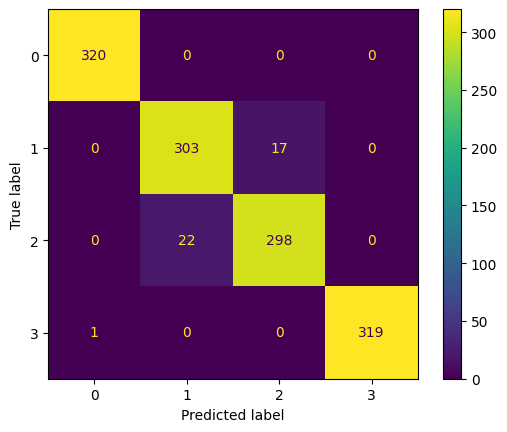

In [22]:
cm = confusion_matrix(y_testing, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [23]:
parameters = {"criterion" : ["gini", "entropy", "log_loss"],
              # "splitter" : ["best", "random"],
              "max_depth" : [7, 10, 15],
              "min_samples_split" : [2, 5],
              "min_samples_leaf" : [1, 3],
              "max_leaf_nodes" : [20, 30, 40, 50],
              }

DTC = DecisionTreeClassifier()
clf_grid_DT = GridSearchCV(DTC, parameters, n_jobs = 10, verbose = 3)
clf_grid_DT.fit(X_training, y_training)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=10,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [7, 10, 15],
                         'max_leaf_nodes': [20, 30, 40, 50],
                         'min_samples_leaf': [1, 3],
                         'min_samples_split': [2, 5]},
             verbose=3)

In [24]:
pd.DataFrame(clf_grid_DT.cv_results_).to_csv("./clf_grid_DT.csv")

In [25]:
pd.DataFrame(clf_grid_DT.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.041378,0.013796,0.007471,0.005031,gini,7,20,1,2,"{'criterion': 'gini', 'max_depth': 7, 'max_lea...",0.958984,0.958984,0.952148,0.945312,0.943359,0.951758,0.006583,115
1,0.098868,0.016546,0.004785,0.005099,gini,7,20,1,5,"{'criterion': 'gini', 'max_depth': 7, 'max_lea...",0.958008,0.958984,0.952148,0.945312,0.943359,0.951562,0.006377,125
2,0.060035,0.015833,0.003427,0.004484,gini,7,20,3,2,"{'criterion': 'gini', 'max_depth': 7, 'max_lea...",0.958984,0.958984,0.952148,0.945312,0.943359,0.951758,0.006583,115
3,0.057370,0.014118,0.008163,0.004666,gini,7,20,3,5,"{'criterion': 'gini', 'max_depth': 7, 'max_lea...",0.958984,0.958984,0.952148,0.945312,0.943359,0.951758,0.006583,115
4,0.068351,0.006377,0.004187,0.005835,gini,7,30,1,2,"{'criterion': 'gini', 'max_depth': 7, 'max_lea...",0.957031,0.955078,0.958984,0.947266,0.943359,0.952344,0.006001,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.073325,0.005045,0.002884,0.003607,log_loss,15,40,3,5,"{'criterion': 'log_loss', 'max_depth': 15, 'ma...",0.967773,0.963867,0.959961,0.950195,0.955078,0.959375,0.006226,35
140,0.073194,0.004876,0.002870,0.002235,log_loss,15,50,1,2,"{'criterion': 'log_loss', 'max_depth': 15, 'ma...",0.963867,0.961914,0.965820,0.954102,0.958984,0.960938,0.004097,18
141,0.067631,0.011831,0.006397,0.004358,log_loss,15,50,1,5,"{'criterion': 'log_loss', 'max_depth': 15, 'ma...",0.963867,0.963867,0.965820,0.952148,0.958008,0.960742,0.005033,20
142,0.061361,0.008958,0.000978,0.000030,log_loss,15,50,3,2,"{'criterion': 'log_loss', 'max_depth': 15, 'ma...",0.964844,0.964844,0.965820,0.952148,0.959961,0.961523,0.005116,12


In [26]:
clf_grid_DT.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'max_leaf_nodes': 50,
 'min_samples_leaf': 3,
 'min_samples_split': 5}

In [27]:
y_pred = clf_grid_DT.predict(X_testing)

In [28]:
print(classification_report(y_testing, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       320
           1       0.92      0.94      0.93       320
           2       0.94      0.92      0.93       320
           3       1.00      1.00      1.00       320

    accuracy                           0.96      1280
   macro avg       0.96      0.96      0.96      1280
weighted avg       0.96      0.96      0.96      1280



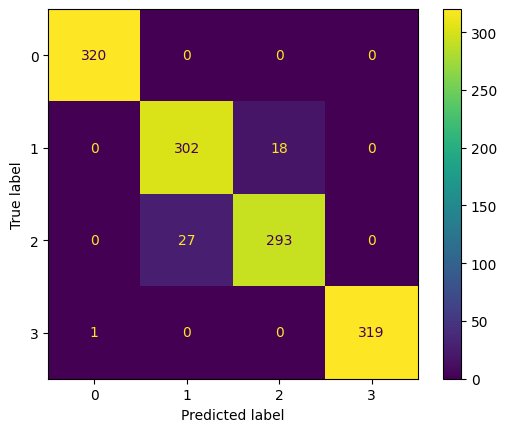

In [29]:
cm = confusion_matrix(y_testing, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## SVM

In [30]:
from sklearn.svm import SVC

clf_SVM = SVC()
clf_SVM.fit(X_training, y_training)

SVC()

In [31]:
y_pred = clf_SVM.predict(X_testing)

In [32]:
print(classification_report(y_testing, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       320
           1       0.91      0.88      0.90       320
           2       0.89      0.91      0.90       320
           3       1.00      1.00      1.00       320

    accuracy                           0.95      1280
   macro avg       0.95      0.95      0.95      1280
weighted avg       0.95      0.95      0.95      1280



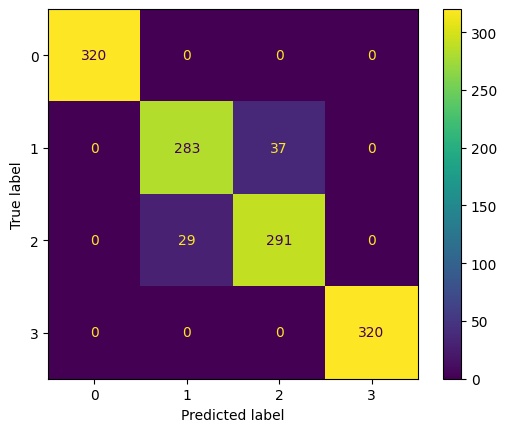

In [33]:
cm = confusion_matrix(y_testing, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [34]:
parameters = {'C': [0.1, 0.5, 1, 10, 100, 1000],
              "gamma" : ["scale", "auto"],
              'kernel': ["linear", "rbf"]
              }

clf_SVM = SVC()
clf_SVM_grid = GridSearchCV(clf_SVM, parameters, n_jobs = 10, verbose = 3)
clf_SVM_grid.fit(X_training, y_training)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=SVC(), n_jobs=10,
             param_grid={'C': [0.1, 0.5, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [35]:
pd.DataFrame(clf_SVM_grid.cv_results_).to_csv("./clf_SVM_grid.csv")

In [36]:
pd.DataFrame(clf_SVM_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.691275,0.065100,0.321101,0.066799,0.1,scale,linear,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}",0.827148,0.830078,0.847656,0.839844,0.849609,0.838867,0.009035,23
1,1.426006,0.306320,0.788440,0.098954,0.1,scale,rbf,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}",0.912109,0.924805,0.922852,0.905273,0.910156,0.915039,0.007539,11
2,1.336854,0.140130,0.396656,0.031167,0.1,auto,linear,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}",0.827148,0.830078,0.847656,0.839844,0.849609,0.838867,0.009035,23
3,1.328246,0.087710,0.728752,0.051831,0.1,auto,rbf,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}",0.912109,0.924805,0.922852,0.905273,0.910156,0.915039,0.007539,11
4,1.233457,0.103646,0.371173,0.018499,0.5,scale,linear,"{'C': 0.5, 'gamma': 'scale', 'kernel': 'linear'}",0.839844,0.833008,0.860352,0.848633,0.852539,0.846875,0.009576,21
5,0.863895,0.026240,0.556734,0.035880,0.5,scale,rbf,"{'C': 0.5, 'gamma': 'scale', 'kernel': 'rbf'}",0.937500,0.938477,0.930664,0.928711,0.924805,0.932031,0.005226,9
6,1.237594,0.073379,0.405270,0.025107,0.5,auto,linear,"{'C': 0.5, 'gamma': 'auto', 'kernel': 'linear'}",0.839844,0.833008,0.860352,0.848633,0.852539,0.846875,0.009576,21
7,0.878846,0.056435,0.514797,0.056124,0.5,auto,rbf,"{'C': 0.5, 'gamma': 'auto', 'kernel': 'rbf'}",0.937500,0.938477,0.930664,0.928711,0.924805,0.932031,0.005226,9
8,1.337905,0.080542,0.416788,0.076567,1,scale,linear,"{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}",0.841797,0.834961,0.861328,0.850586,0.854492,0.848633,0.009306,19
9,0.782319,0.026156,0.751650,0.131719,1,scale,rbf,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}",0.944336,0.942383,0.941406,0.935547,0.933594,0.939453,0.004143,7


In [37]:
clf_SVM_grid.best_params_

{'C': 1000, 'gamma': 'scale', 'kernel': 'rbf'}

In [38]:
y_pred = clf_SVM_grid.predict(X_testing)

In [39]:
print(classification_report(y_testing, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       320
           1       0.92      0.95      0.93       320
           2       0.95      0.91      0.93       320
           3       1.00      1.00      1.00       320

    accuracy                           0.97      1280
   macro avg       0.97      0.97      0.97      1280
weighted avg       0.97      0.97      0.97      1280



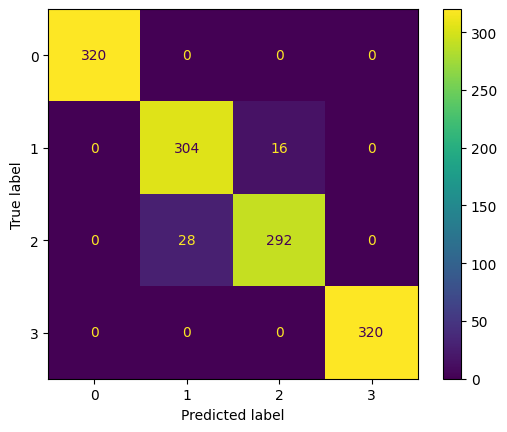

In [40]:
cm = confusion_matrix(y_testing, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## KNeighbors

In [41]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier()
neigh.fit(X_training, y_training)

KNeighborsClassifier()

In [42]:
y_pred = neigh.predict_proba(X_testing)

In [43]:
y_pred = np.argmax(y_pred, axis = 1)

In [44]:
print(classification_report(y_testing, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       320
           1       0.94      0.96      0.95       320
           2       0.96      0.93      0.95       320
           3       1.00      1.00      1.00       320

    accuracy                           0.97      1280
   macro avg       0.97      0.97      0.97      1280
weighted avg       0.97      0.97      0.97      1280



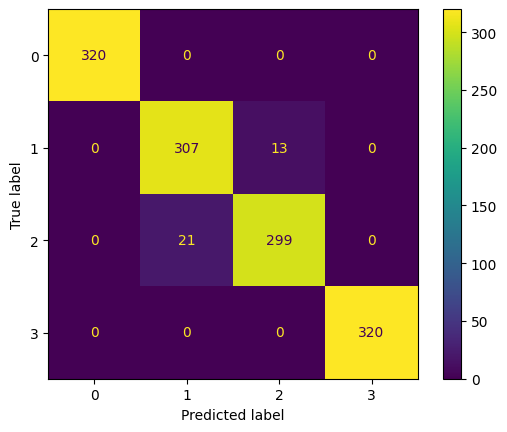

In [45]:
cm = confusion_matrix(y_testing, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [46]:
parameters = {'n_neighbors': [3, 5, 7, 10, 15],
              "weights" : ["uniform", "distance"],
              'p': [1, 2]
              }

neigh = KNeighborsClassifier()
neigh_grid = GridSearchCV(neigh, parameters, n_jobs = 10, verbose = 3)
neigh_grid.fit(X_training, y_training)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=10,
             param_grid={'n_neighbors': [3, 5, 7, 10, 15], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [47]:
pd.DataFrame(neigh_grid.cv_results_).to_csv("./neigh_grid.csv")

In [48]:
pd.DataFrame(neigh_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.032919,0.025335,0.465142,0.128468,3,1,uniform,"{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}",0.983398,0.978516,0.977539,0.958984,0.974609,0.974609,0.008309,2
1,0.040419,0.012237,0.081709,0.005405,3,1,distance,"{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}",0.985352,0.978516,0.978516,0.959961,0.975586,0.975586,0.008446,1
2,0.032153,0.004695,0.479911,0.010106,3,2,uniform,"{'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}",0.981445,0.974609,0.972656,0.960938,0.971680,0.972266,0.006612,8
3,0.031830,0.004525,0.055279,0.008441,3,2,distance,"{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}",0.983398,0.974609,0.973633,0.961914,0.972656,0.973242,0.006839,4
4,0.033885,0.002709,0.531694,0.061314,5,1,uniform,"{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}",0.979492,0.971680,0.971680,0.961914,0.964844,0.969922,0.006127,11
5,0.037871,0.007151,0.096351,0.018041,5,1,distance,"{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}",0.983398,0.977539,0.975586,0.964844,0.967773,0.973828,0.006721,3
6,0.037190,0.005464,0.502738,0.024493,5,2,uniform,"{'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}",0.978516,0.968750,0.969727,0.963867,0.966797,0.969531,0.004918,12
7,0.029829,0.004480,0.073029,0.006299,5,2,distance,"{'n_neighbors': 5, 'p': 2, 'weights': 'distance'}",0.981445,0.971680,0.971680,0.965820,0.970703,0.972266,0.005078,8
8,0.043153,0.006255,0.490469,0.084056,7,1,uniform,"{'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}",0.977539,0.975586,0.968750,0.959961,0.960938,0.968555,0.007240,14
9,0.027132,0.004901,0.084339,0.015266,7,1,distance,"{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}",0.980469,0.976562,0.972656,0.963867,0.969727,0.972656,0.005694,7


In [49]:
neigh_grid.best_params_

{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

In [50]:
y_pred = neigh_grid.predict_proba(X_testing)

In [51]:
y_pred = np.argmax(y_pred, axis = 1)

In [52]:
print(classification_report(y_testing, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       320
           1       0.95      0.97      0.96       320
           2       0.96      0.95      0.96       320
           3       1.00      1.00      1.00       320

    accuracy                           0.98      1280
   macro avg       0.98      0.98      0.98      1280
weighted avg       0.98      0.98      0.98      1280



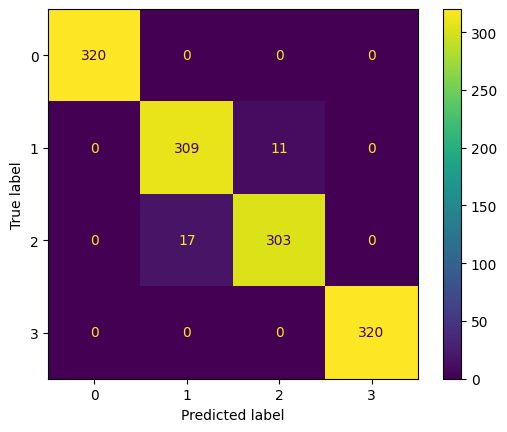

In [53]:
cm = confusion_matrix(y_testing, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## GaussianNB

In [54]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_training, y_training)

GaussianNB()

In [55]:
y_pred = gnb.predict_proba(X_testing)

In [56]:
y_pred = np.argmax(y_pred, axis = 1)

In [57]:
print(classification_report(y_testing, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       320
           1       0.67      0.81      0.74       320
           2       0.76      0.60      0.67       320
           3       1.00      1.00      1.00       320

    accuracy                           0.85      1280
   macro avg       0.86      0.85      0.85      1280
weighted avg       0.86      0.85      0.85      1280



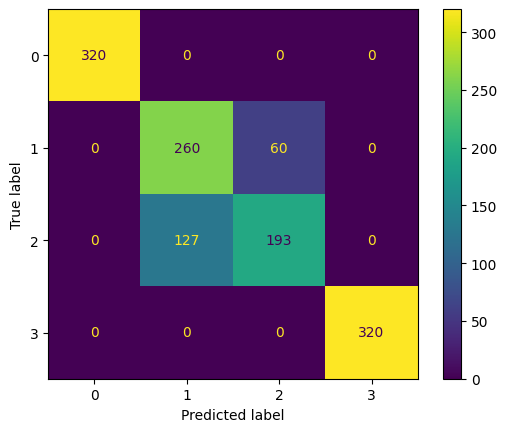

In [58]:
cm = confusion_matrix(y_testing, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## RandomForest

In [59]:
from sklearn.ensemble import RandomForestClassifier

clf_RF = RandomForestClassifier()
clf_RF.fit(X_training, y_training)

RandomForestClassifier()

In [60]:
y_pred = clf_RF.predict_proba(X_testing)

In [61]:
y_pred = np.argmax(y_pred, axis = 1)

In [62]:
print(classification_report(y_testing, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       320
           1       0.94      0.97      0.95       320
           2       0.96      0.94      0.95       320
           3       1.00      1.00      1.00       320

    accuracy                           0.98      1280
   macro avg       0.98      0.98      0.98      1280
weighted avg       0.98      0.98      0.98      1280



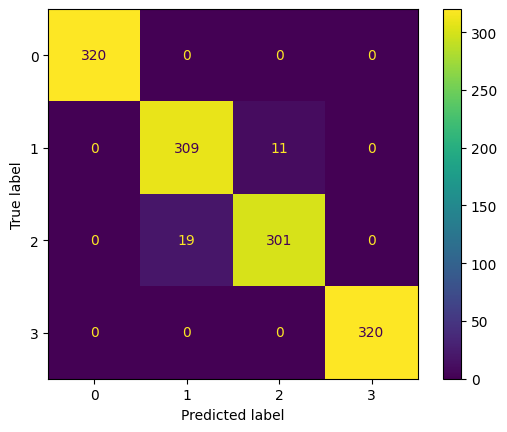

In [63]:
cm = confusion_matrix(y_testing, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [64]:
parameters = {"n_estimators" : [100, 200, 300, 500],
              "max_depth" : [7, 10, 15],
              "min_samples_split" : [2, 5, 7],
              }

RFC = RandomForestClassifier()
clf_grid_RF = GridSearchCV(RFC, parameters, n_jobs = 10, verbose = 3)
clf_grid_RF.fit(X_training, y_training)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=10,
             param_grid={'max_depth': [7, 10, 15],
                         'min_samples_split': [2, 5, 7],
                         'n_estimators': [100, 200, 300, 500]},
             verbose=3)

In [65]:
pd.DataFrame(clf_grid_RF.cv_results_).to_csv("./clf_grid_RF.csv")

In [66]:
pd.DataFrame(clf_grid_RF.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.893713,0.156824,0.128631,0.027367,7,2,100,"{'max_depth': 7, 'min_samples_split': 2, 'n_es...",0.957031,0.951172,0.958008,0.945312,0.938477,0.950000,0.007344,26
1,6.057359,1.242930,0.334262,0.065053,7,2,200,"{'max_depth': 7, 'min_samples_split': 2, 'n_es...",0.956055,0.952148,0.959961,0.945312,0.935547,0.949805,0.008616,28
2,10.772369,0.167609,0.311428,0.013302,7,2,300,"{'max_depth': 7, 'min_samples_split': 2, 'n_es...",0.956055,0.954102,0.957031,0.946289,0.935547,0.949805,0.008067,28
3,15.566607,0.301386,0.733261,0.152868,7,2,500,"{'max_depth': 7, 'min_samples_split': 2, 'n_es...",0.956055,0.953125,0.957031,0.945312,0.933594,0.949023,0.008743,34
4,2.629672,0.091770,0.112896,0.011970,7,5,100,"{'max_depth': 7, 'min_samples_split': 5, 'n_es...",0.955078,0.955078,0.953125,0.945312,0.940430,0.949805,0.005911,28
5,5.212419,0.208531,0.274041,0.073961,7,5,200,"{'max_depth': 7, 'min_samples_split': 5, 'n_es...",0.955078,0.953125,0.956055,0.945312,0.936523,0.949219,0.007386,33
6,10.607271,0.230723,0.333963,0.036752,7,5,300,"{'max_depth': 7, 'min_samples_split': 5, 'n_es...",0.956055,0.955078,0.955078,0.945312,0.935547,0.949414,0.007967,31
7,15.105300,0.300999,0.752734,0.127563,7,5,500,"{'max_depth': 7, 'min_samples_split': 5, 'n_es...",0.957031,0.955078,0.957031,0.944336,0.937500,0.950195,0.007910,25
8,2.517413,0.082615,0.121802,0.008908,7,7,100,"{'max_depth': 7, 'min_samples_split': 7, 'n_es...",0.955078,0.954102,0.956055,0.944336,0.937500,0.949414,0.007292,31
9,6.795112,0.390203,0.348545,0.043992,7,7,200,"{'max_depth': 7, 'min_samples_split': 7, 'n_es...",0.956055,0.953125,0.954102,0.942383,0.937500,0.948633,0.007324,35


In [67]:
clf_grid_RF.best_params_

{'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 500}

In [68]:
y_pred = clf_grid_RF.predict_proba(X_testing)

In [69]:
y_pred = np.argmax(y_pred, axis = 1)

In [70]:
print(classification_report(y_testing, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       320
           1       0.94      0.97      0.95       320
           2       0.97      0.93      0.95       320
           3       1.00      1.00      1.00       320

    accuracy                           0.98      1280
   macro avg       0.98      0.98      0.98      1280
weighted avg       0.98      0.98      0.98      1280



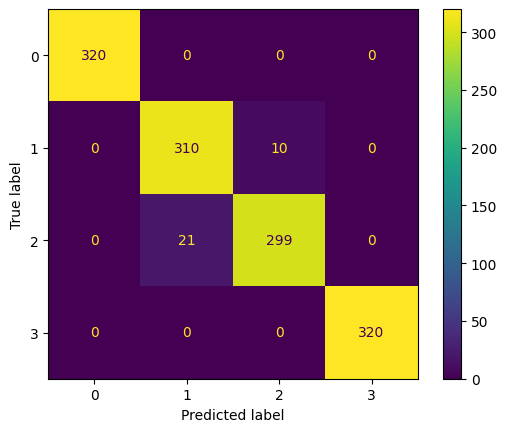

In [71]:
cm = confusion_matrix(y_testing, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## XGBoost

In [72]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_training, y_training)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [73]:
y_pred = xgb.predict_proba(X_testing)

In [74]:
y_pred

array([[4.6276491e-05, 1.4612841e-04, 9.9978966e-01, 1.7916318e-05],
       [3.7956484e-05, 4.7265636e-05, 9.9990010e-01, 1.4695174e-05],
       [9.9994600e-01, 4.9988853e-06, 3.7862130e-05, 1.1117080e-05],
       ...,
       [7.2563244e-06, 9.9989712e-01, 8.6855827e-05, 8.8024208e-06],
       [9.9942648e-01, 6.8814465e-05, 2.7410801e-05, 4.7729598e-04],
       [1.3550698e-04, 9.1731477e-01, 8.2385316e-02, 1.6437929e-04]],
      dtype=float32)

In [75]:
y_pred = np.argmax(y_pred, axis = 1)

In [76]:
print(classification_report(y_testing, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       320
           1       0.93      0.97      0.95       320
           2       0.97      0.93      0.95       320
           3       1.00      1.00      1.00       320

    accuracy                           0.97      1280
   macro avg       0.98      0.97      0.97      1280
weighted avg       0.98      0.97      0.97      1280



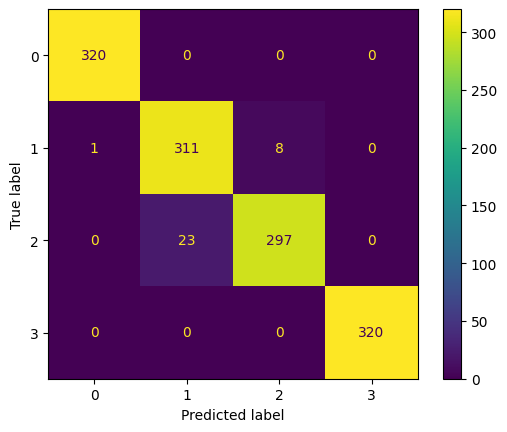

In [77]:
cm = confusion_matrix(y_testing, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [78]:
parameters = {"n_estimators" : [100, 200, 300, 500],
              "max_depth" : [7, 10, 15],
              "min_samples_split" : [2, 5, 7],
              }

xgb = XGBClassifier()
xgb_grid = GridSearchCV(xgb, parameters, n_jobs = 10, verbose = 3)
xgb_grid.fit(X_training, y_training)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:04:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=10,
             param_grid={'max_depth': [7, 10, 15],
                         'min_samples_split': [2, 5, 7],
                         'n_estimators': [100, 200, 300, 500]},
             verbose=3)

In [79]:
pd.DataFrame(xgb_grid.cv_results_).to_csv("./xgb_grid.csv")

In [80]:
pd.DataFrame(xgb_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.318124,0.283748,0.046564,0.015605,7,2,100,"{'max_depth': 7, 'min_samples_split': 2, 'n_es...",0.982422,0.976562,0.978516,0.966797,0.974609,0.975781,0.005182,28
1,6.391001,0.029750,0.116245,0.019764,7,2,200,"{'max_depth': 7, 'min_samples_split': 2, 'n_es...",0.982422,0.976562,0.978516,0.966797,0.976562,0.976172,0.005153,13
2,7.507588,0.221681,0.213828,0.049520,7,2,300,"{'max_depth': 7, 'min_samples_split': 2, 'n_es...",0.982422,0.974609,0.979492,0.967773,0.976562,0.976172,0.004964,13
3,7.728668,0.209001,0.182915,0.027597,7,2,500,"{'max_depth': 7, 'min_samples_split': 2, 'n_es...",0.982422,0.973633,0.979492,0.967773,0.976562,0.975977,0.005040,22
4,1.985464,0.160693,0.052626,0.017030,7,5,100,"{'max_depth': 7, 'min_samples_split': 5, 'n_es...",0.982422,0.976562,0.978516,0.966797,0.974609,0.975781,0.005182,28
5,3.489849,0.130030,0.105103,0.012161,7,5,200,"{'max_depth': 7, 'min_samples_split': 5, 'n_es...",0.982422,0.976562,0.978516,0.966797,0.976562,0.976172,0.005153,13
6,5.856734,0.332270,0.228695,0.013498,7,5,300,"{'max_depth': 7, 'min_samples_split': 5, 'n_es...",0.982422,0.974609,0.979492,0.967773,0.976562,0.976172,0.004964,13
7,10.124435,0.202666,0.213414,0.011043,7,5,500,"{'max_depth': 7, 'min_samples_split': 5, 'n_es...",0.982422,0.973633,0.979492,0.967773,0.976562,0.975977,0.005040,22
8,3.501355,0.067150,0.107217,0.017068,7,7,100,"{'max_depth': 7, 'min_samples_split': 7, 'n_es...",0.982422,0.976562,0.978516,0.966797,0.974609,0.975781,0.005182,28
9,3.930435,0.289521,0.098684,0.007010,7,7,200,"{'max_depth': 7, 'min_samples_split': 7, 'n_es...",0.982422,0.976562,0.978516,0.966797,0.976562,0.976172,0.005153,13


In [81]:
xgb_grid.best_params_

{'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 300}

In [82]:
y_pred = xgb_grid.predict_proba(X_testing)

In [83]:
y_pred = np.argmax(y_pred, axis = 1)

In [84]:
print(classification_report(y_testing, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       320
           1       0.95      0.97      0.96       320
           2       0.97      0.95      0.96       320
           3       1.00      1.00      1.00       320

    accuracy                           0.98      1280
   macro avg       0.98      0.98      0.98      1280
weighted avg       0.98      0.98      0.98      1280



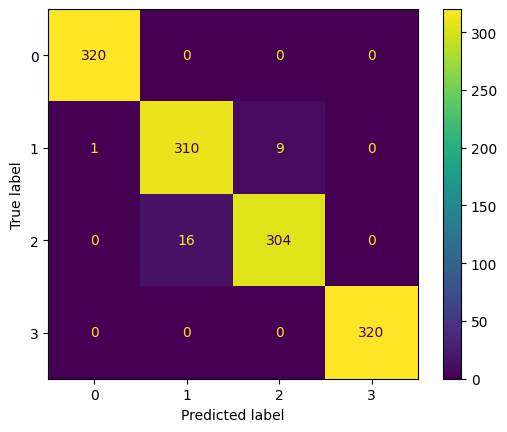

In [85]:
cm = confusion_matrix(y_testing, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## MLP

In [86]:
import tensorflow as tf

In [87]:
def mlp():
    # Input
    img = tf.keras.layers.Input(shape = (7,))
    # vec to label
    x = tf.keras.layers.Dense(512, activation='relu')(img)
    x = tf.keras.layers.BatchNormalization()(x)

    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)

    x = tf.keras.layers.Dense(256, activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)

    x = tf.keras.layers.Dense(256, activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)

    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)

    predict = tf.keras.layers.Dense(4, activation='softmax')(x)
    # Model
    model = tf.keras.Model(inputs=[img], outputs=[predict])

    return(model)

In [88]:
model_mlp = mlp()

In [89]:
model_mlp.compile(optimizer="adam",
              loss = tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [90]:
history = model_mlp.fit(
    X_training, y_training,
    batch_size=64,
    epochs=20,
    verbose="auto",
    callbacks=None,
    validation_split=0.1,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
    )

Epoch 1/20
72/72 [==============================] - 11s 10ms/step - loss: 0.2292 - accuracy: 0.9069 - val_loss: 0.9925 - val_accuracy: 0.5215
Epoch 2/20
72/72 [==============================] - 0s 6ms/step - loss: 0.1560 - accuracy: 0.9353 - val_loss: 0.7883 - val_accuracy: 0.6602
Epoch 3/20
72/72 [==============================] - 0s 6ms/step - loss: 0.1358 - accuracy: 0.9451 - val_loss: 0.6758 - val_accuracy: 0.7461
Epoch 4/20
72/72 [==============================] - 0s 6ms/step - loss: 0.1293 - accuracy: 0.9486 - val_loss: 0.5436 - val_accuracy: 0.7695
Epoch 5/20
72/72 [==============================] - 0s 6ms/step - loss: 0.1235 - accuracy: 0.9470 - val_loss: 0.2812 - val_accuracy: 0.8555
Epoch 6/20
72/72 [==============================] - 0s 7ms/step - loss: 0.1354 - accuracy: 0.9434 - val_loss: 0.1880 - val_accuracy: 0.9219
Epoch 7/20
72/72 [==============================] - 0s 6ms/step - loss: 0.1238 - accuracy: 0.9486 - val_loss: 0.1302 - val_accuracy: 0.9473
Epoch 8/20
72/72 [

In [91]:
y_pred = model_mlp.predict(X_testing)

40/40 [==============================] - 0s 2ms/step


In [92]:
y_pred = np.argmax(y_pred, axis = 1)

In [93]:
print(classification_report(y_testing, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       320
           1       0.89      0.96      0.92       320
           2       0.96      0.88      0.92       320
           3       1.00      1.00      1.00       320

    accuracy                           0.96      1280
   macro avg       0.96      0.96      0.96      1280
weighted avg       0.96      0.96      0.96      1280



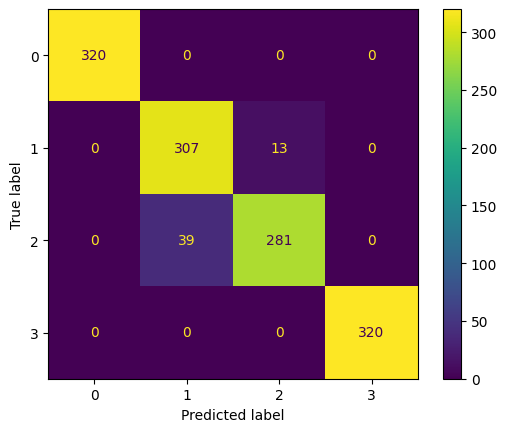

In [94]:
cm = confusion_matrix(y_testing, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [104]:
del model_mlp

## Ensembel

In [95]:
y_prob_knn = neigh_grid.predict_proba(X_testing)
y_prob_rf = clf_grid_RF.predict_proba(X_testing)
y_prob_xgb = xgb_grid.predict_proba(X_testing)
y_prob_mlp = model_mlp.predict(X_testing)


y_ensembel = np.mean([y_prob_knn, y_prob_rf, y_prob_xgb, y_prob_mlp], axis=0)

40/40 [==============================] - 0s 2ms/step


In [96]:
y_ensembel = np.argmax(y_ensembel, axis = 1)

In [97]:
print(classification_report(y_testing, y_ensembel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       320
           1       0.95      0.98      0.96       320
           2       0.98      0.95      0.96       320
           3       1.00      1.00      1.00       320

    accuracy                           0.98      1280
   macro avg       0.98      0.98      0.98      1280
weighted avg       0.98      0.98      0.98      1280



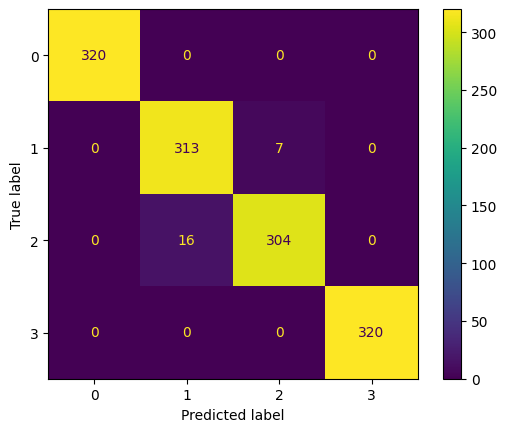

In [98]:
cm = confusion_matrix(y_testing, y_ensembel)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [99]:
from sklearn.ensemble import VotingClassifier


ens_model = VotingClassifier(
    estimators=[
        ('RF', RandomForestClassifier(max_depth=15, min_samples_split=2, n_estimators=300)),
        ('SVM', SVC(C=1000, gamma='scale', kernel='rbf')),
        ('XGB', XGBClassifier(max_depth=15, min_samples_split= 2, n_estimators=300))
    ],
)

In [100]:
ens_model.fit(X_training, y_training)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:05:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


VotingClassifier(estimators=[('RF',
                              RandomForestClassifier(max_depth=15,
                                                     n_estimators=300)),
                             ('SVM', SVC(C=1000)),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=15,
                                            max_leaves=None,
                                            min_child_weight=None,
                                            min_samples_split=2, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None, ...))])

In [101]:
y_pred = ens_model.predict(X_testing)

In [102]:
print(classification_report(y_testing, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       320
           1       0.94      0.97      0.96       320
           2       0.97      0.94      0.95       320
           3       1.00      1.00      1.00       320

    accuracy                           0.98      1280
   macro avg       0.98      0.98      0.98      1280
weighted avg       0.98      0.98      0.98      1280



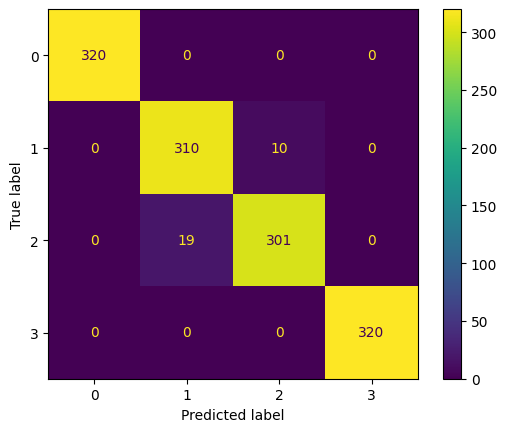

In [103]:
cm = confusion_matrix(y_testing, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [105]:
del ens_model

# Image

## Divide X_train into 4 parts

In [106]:
X_train_temp, X_train_1, _, _ = train_test_split(
     X_train, X_train["Gas"], test_size=0.25, random_state=0, stratify = X_train["Gas"])

In [107]:
X_train_temp, X_train_2, _, _ = train_test_split(
     X_train_temp, X_train_temp["Gas"], test_size=1/3, random_state=0, stratify = X_train_temp["Gas"])

In [108]:
X_train_3, X_train_4, _, _ = train_test_split(
     X_train_temp, X_train_temp["Gas"], test_size=0.5, random_state=0, stratify = X_train_temp["Gas"])

In [109]:
X_train_1.reset_index(drop=True, inplace=True)
X_train_2.reset_index(drop=True, inplace=True)
X_train_3.reset_index(drop=True, inplace=True)
X_train_4.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

In [110]:
import tensorflow as tf

## Convolutional Neural Network

In [152]:
def vision_cnn():
    # Input
    img = tf.keras.layers.Input(shape = (640, 480, 3))
    # Image to vec
    x = tf.keras.layers.Conv2D(filters=32,
                                kernel_size=3,
                                strides=(3, 3),
                                activation='relu')(img)

    x = tf.keras.layers.MaxPooling2D ()(x)
    x = tf.keras.layers.BatchNormalization()(x)


    x = tf.keras.layers.Conv2D(filters=32,
                                kernel_size=3,
                                strides=(3, 3),
                                activation='relu')(x)

    x = tf.keras.layers.MaxPooling2D ()(x)
    x = tf.keras.layers.BatchNormalization()(x)


    x = tf.keras.layers.Conv2D(filters=16,
                                kernel_size=3,
                                strides=(3, 3),
                                activation='relu')(x)

    x = tf.keras.layers.MaxPooling2D ()(x)
    x = tf.keras.layers.BatchNormalization()(x)


    x = tf.keras.layers.Flatten()(x)
    # x = tf.keras.layers.BatchNormalization()(x)
    # vec to label
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)

    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)

    x = tf.keras.layers.Dense(256, activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)

    x = tf.keras.layers.Dense(256, activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)

    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)

    predict = tf.keras.layers.Dense(4, activation='softmax')(x)
    # Model
    model = tf.keras.Model(inputs=[img], outputs=[predict])

    return(model)

In [153]:
model_cnn = vision_cnn()

In [154]:
model_cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss = tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [155]:
model_cnn.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 640, 480, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 213, 160, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 106, 80, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_22 (Ba  (None, 106, 80, 32)       128       
 tchNormalization)                                               
                                                                 
 conv2d_7 (Conv2D)           (None, 35, 26, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 17, 13, 32)        0   

In [156]:
def fit_vision_model (model, train_data, label_data):
    history = model.fit(
        train_data, label_data,
        batch_size=64,
        epochs=15,
        verbose="auto",
        callbacks=None,
        validation_split=0.1,
        validation_data=None,
        shuffle=True,
        class_weight=None,
        sample_weight=None,
        initial_epoch=0,
        steps_per_epoch=None,
        validation_steps=None,
        validation_batch_size=None,
        validation_freq=1,
        max_queue_size=10,
        workers=1,
        use_multiprocessing=False,
        )

    return (history)

In [157]:
from PIL import Image
from sklearn.preprocessing import LabelEncoder
import gc

In [158]:
directory = "/content/Data/Images/"
train_set = [X_train_1, X_train_2, X_train_3, X_train_4]
flag_firs = True
list_history = []


for train in train_set:
    list_image = []
    for index, row in train.iterrows():
        dir_image = directory + row["Corresponding Image Name"] + ".png"
        image = Image.open(dir_image)
        image = np.array(image)
        list_image.append(image)
    list_image = np.array(list_image)


    if (flag_firs):
        le = LabelEncoder()
        target = le.fit_transform(train["Gas"])
        flag_firs = False
    else :
        target = le.transform(train["Gas"])


    h_part = fit_vision_model(model_cnn, list_image, target)
    list_history.append(h_part)

Epoch 1/15
18/18 [==============================] - 6s 101ms/step - loss: 0.7934 - accuracy: 0.6884 - val_loss: 1.3031 - val_accuracy: 0.2891
Epoch 2/15
18/18 [==============================] - 2s 92ms/step - loss: 0.2946 - accuracy: 0.8845 - val_loss: 1.0950 - val_accuracy: 0.4844
Epoch 3/15
18/18 [==============================] - 2s 85ms/step - loss: 0.1696 - accuracy: 0.9444 - val_loss: 1.0042 - val_accuracy: 0.5547
Epoch 4/15
18/18 [==============================] - 1s 66ms/step - loss: 0.1311 - accuracy: 0.9514 - val_loss: 0.9087 - val_accuracy: 0.6094
Epoch 5/15
18/18 [==============================] - 1s 62ms/step - loss: 0.0842 - accuracy: 0.9731 - val_loss: 0.8027 - val_accuracy: 0.6953
Epoch 6/15
18/18 [==============================] - 1s 62ms/step - loss: 0.0691 - accuracy: 0.9809 - val_loss: 0.6641 - val_accuracy: 0.7812
Epoch 7/15
18/18 [==============================] - 1s 63ms/step - loss: 0.0612 - accuracy: 0.9800 - val_loss: 0.6328 - val_accuracy: 0.7734
Epoch 8/15
1

In [159]:
model_cnn.save('my_model_vision_only.keras')
# del model

In [160]:
# model_cnn = tf.keras.models.load_model('my_model_vision_only.keras')
# model.summary()

In [161]:
dict_learnin = dict()
dict_learnin['accuracy'] = []
dict_learnin['val_accuracy'] = []
dict_learnin['loss'] = []
dict_learnin['val_loss'] = []
for i, hist in enumerate(list_history):
    dict_learnin['accuracy'].extend(hist.history['accuracy'])
    dict_learnin['val_accuracy'].extend(hist.history['val_accuracy'])
    dict_learnin['loss'].extend(hist.history['loss'])
    dict_learnin['val_loss'].extend(hist.history['val_loss'])

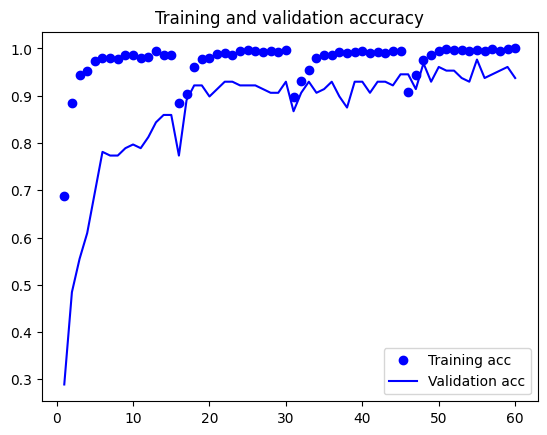

In [162]:
import matplotlib.pyplot as plt

acc = dict_learnin['accuracy']
val_acc = dict_learnin['val_accuracy']


epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

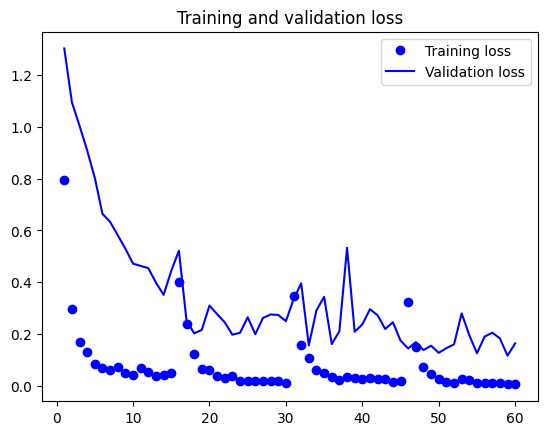

In [163]:
loss = dict_learnin['loss']
val_loss = dict_learnin['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [164]:
del list_image
del target
del list_history[:]
del dict_learnin
gc.collect()

16260

In [165]:
directory = "/content/Data/Images/"
list_image = []
for index, row in X_test.iterrows():
    dir_image = directory + str(row['Serial Number']) + "_" + str(row['Gas']) +".png"
    image = Image.open(dir_image)
    image = np.array(image)
    list_image.append(image)

list_image = np.array(list_image)

In [166]:
y_test = le.transform(X_test["Gas"])

In [167]:
y_pred = model_cnn.predict(list_image)

40/40 [==============================] - 1s 22ms/step


In [168]:
y_pred = np.argmax(y_pred, axis = 1)

In [169]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       320
           1       0.89      0.89      0.89       320
           2       0.90      0.88      0.89       320
           3       0.95      0.97      0.96       320

    accuracy                           0.93      1280
   macro avg       0.93      0.93      0.93      1280
weighted avg       0.93      0.93      0.93      1280



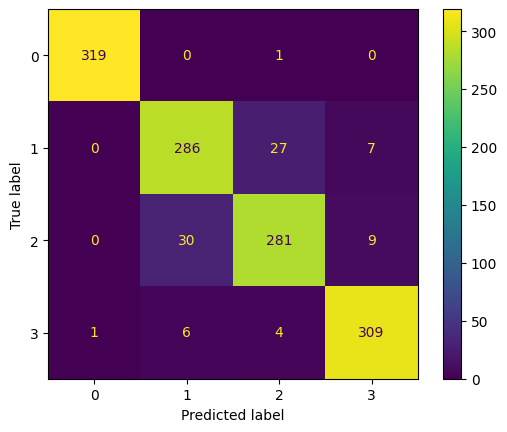

In [170]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [171]:
# del list_image
del y_test
del model_cnn
gc.collect()

6249

# Multimodal

In [131]:
def vision_tabular():
    # Input
    tabular_data = tf.keras.layers.Input(shape = (7,))
    img = tf.keras.layers.Input(shape = (640, 480, 3))
    # Image to vec
    x = tf.keras.layers.Conv2D(filters=32,
                                kernel_size=3,
                                strides=(3, 3),
                                activation='relu')(img)

    x = tf.keras.layers.MaxPooling2D ()(x)
    x = tf.keras.layers.BatchNormalization()(x)


    x = tf.keras.layers.Conv2D(filters=32,
                                kernel_size=3,
                                strides=(3, 3),
                                activation='relu')(x)

    x = tf.keras.layers.MaxPooling2D ()(x)
    x = tf.keras.layers.BatchNormalization()(x)


    x = tf.keras.layers.Conv2D(filters=16,
                                kernel_size=3,
                                strides=(3, 3),
                                activation='relu')(x)

    x = tf.keras.layers.MaxPooling2D ()(x)
    x = tf.keras.layers.BatchNormalization()(x)


    x = tf.keras.layers.Flatten()(x)
    multimodal_layer = tf.keras.layers.Concatenate()([x, tabular_data])
    x = tf.keras.layers.BatchNormalization()(multimodal_layer)
    # vec to label
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    multimodal_layer = tf.keras.layers.Concatenate()([x, tabular_data])
    x = tf.keras.layers.BatchNormalization()(multimodal_layer)

    x = tf.keras.layers.Dense(512, activation='relu')(x)
    multimodal_layer = tf.keras.layers.Concatenate()([x, tabular_data])
    x = tf.keras.layers.BatchNormalization()(multimodal_layer)

    x = tf.keras.layers.Dense(256, activation='relu')(x)
    multimodal_layer = tf.keras.layers.Concatenate()([x, tabular_data])
    x = tf.keras.layers.BatchNormalization()(multimodal_layer)

    x = tf.keras.layers.Dense(256, activation='relu')(x)
    multimodal_layer = tf.keras.layers.Concatenate()([x, tabular_data])
    x = tf.keras.layers.BatchNormalization()(multimodal_layer)

    x = tf.keras.layers.Dense(128, activation='relu')(x)
    multimodal_layer = tf.keras.layers.Concatenate()([x, tabular_data])
    x = tf.keras.layers.BatchNormalization()(multimodal_layer)

    predict = tf.keras.layers.Dense(4, activation='softmax')(x)
    # Model
    model = tf.keras.Model(inputs=[img, tabular_data], outputs=[predict])

    return(model)

In [132]:
model_multimodal = vision_tabular()

In [133]:
model_multimodal.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss = tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [134]:
model_multimodal.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 640, 480, 3)]        0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 213, 160, 32)         896       ['input_4[0][0]']             
                                                                                                  
 max_pooling2d_3 (MaxPoolin  (None, 106, 80, 32)          0         ['conv2d_3[0][0]']            
 g2D)                                                                                             
                                                                                                  
 batch_normalization_13 (Ba  (None, 106, 80, 32)          128       ['max_pooling2d_3[0][0]'

In [135]:
def fit_vision_model (model, train_data, label_data):
    history = model.fit(
        train_data, label_data,
        batch_size=64,
        epochs=20,
        verbose="auto",
        callbacks=None,
        validation_split=0.1,
        validation_data=None,
        shuffle=True,
        class_weight=None,
        sample_weight=None,
        initial_epoch=0,
        steps_per_epoch=None,
        validation_steps=None,
        validation_batch_size=None,
        validation_freq=1,
        max_queue_size=10,
        workers=1,
        use_multiprocessing=False,
        )

    return (history)


In [136]:
from PIL import Image
from sklearn.preprocessing import LabelEncoder
import gc

In [137]:
# model.save('my_model.keras')
# del model

In [138]:
directory = "/content/Data/Images/"
train_set = [X_train_1, X_train_2, X_train_3, X_train_4]
flag_firs = True
list_history = []


for train in train_set:
    list_image = []
    for index, row in train.iterrows():
        dir_image = directory + row["Corresponding Image Name"] + ".png"
        image = Image.open(dir_image)
        image = np.array(image)
        list_image.append(image)

    list_image = np.array(list_image)
    tabular_data = train[["MQ2",	"MQ3",	"MQ5",	"MQ6",	"MQ7",	"MQ8",	"MQ135"]]


    if (flag_firs):
        le = LabelEncoder()
        target = le.fit_transform(train["Gas"])
        flag_firs = False
    else :
        target = le.transform(train["Gas"])


    h_part = fit_vision_model(model_multimodal, [list_image, tabular_data], target)
    list_history.append(h_part)


Epoch 1/20
18/18 [==============================] - 8s 91ms/step - loss: 0.6274 - accuracy: 0.7396 - val_loss: 6.9434 - val_accuracy: 0.2891
Epoch 2/20
18/18 [==============================] - 1s 63ms/step - loss: 0.1563 - accuracy: 0.9427 - val_loss: 3.0949 - val_accuracy: 0.2891
Epoch 3/20
18/18 [==============================] - 1s 62ms/step - loss: 0.0727 - accuracy: 0.9774 - val_loss: 2.1929 - val_accuracy: 0.2734
Epoch 4/20
18/18 [==============================] - 1s 64ms/step - loss: 0.0420 - accuracy: 0.9887 - val_loss: 1.8331 - val_accuracy: 0.3203
Epoch 5/20
18/18 [==============================] - 1s 64ms/step - loss: 0.0208 - accuracy: 0.9983 - val_loss: 1.9157 - val_accuracy: 0.2344
Epoch 6/20
18/18 [==============================] - 1s 65ms/step - loss: 0.0195 - accuracy: 0.9948 - val_loss: 1.8539 - val_accuracy: 0.2500
Epoch 7/20
18/18 [==============================] - 1s 62ms/step - loss: 0.0197 - accuracy: 0.9931 - val_loss: 1.7398 - val_accuracy: 0.3359
Epoch 8/20
18

In [139]:
model_multimodal.save('my_model_multimodal.keras')
# del model

In [140]:
# model_multimodal = tf.keras.models.load_model('my_model_multimodal.keras')
# model.summary()

In [141]:
dict_learnin = dict()
dict_learnin['accuracy'] = []
dict_learnin['val_accuracy'] = []
dict_learnin['loss'] = []
dict_learnin['val_loss'] = []
for i, hist in enumerate(list_history):
    dict_learnin['accuracy'].extend(hist.history['accuracy'])
    dict_learnin['val_accuracy'].extend(hist.history['val_accuracy'])
    dict_learnin['loss'].extend(hist.history['loss'])
    dict_learnin['val_loss'].extend(hist.history['val_loss'])

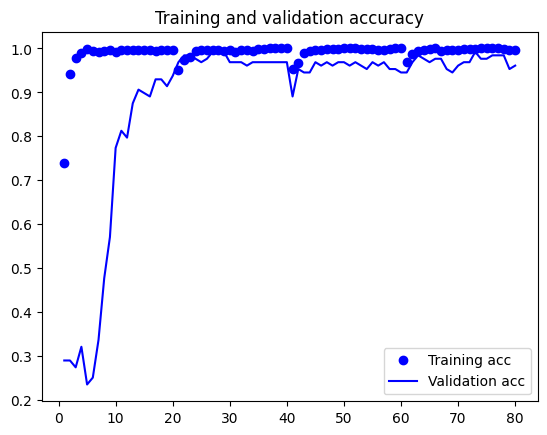

In [142]:
import matplotlib.pyplot as plt

acc = dict_learnin['accuracy']
val_acc = dict_learnin['val_accuracy']


epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

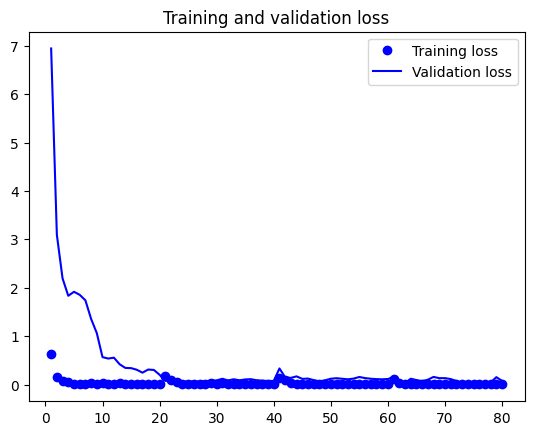

In [143]:
loss = dict_learnin['loss']
val_loss = dict_learnin['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [144]:
del list_image
del target
del list_history[:]
del dict_learnin
gc.collect()

18406

In [145]:
directory = "/content/Data/Images/"
list_image = []
for index, row in X_test.iterrows():
    dir_image = directory + str(row['Serial Number']) + "_" + str(row['Gas']) +".png"
    image = Image.open(dir_image)
    image = np.array(image)
    list_image.append(image)

list_image = np.array(list_image)

In [146]:
y_test = le.transform(X_test["Gas"])

In [147]:
tabular_data = X_test[["MQ2",	"MQ3",	"MQ5",	"MQ6",	"MQ7",	"MQ8",	"MQ135"]]

In [148]:
y_pred = model_multimodal.predict([list_image, tabular_data])

40/40 [==============================] - 1s 26ms/step


In [149]:
y_pred = np.argmax(y_pred, axis = 1)

In [150]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       320
           1       0.97      0.90      0.94       320
           2       0.91      0.97      0.94       320
           3       1.00      1.00      1.00       320

    accuracy                           0.97      1280
   macro avg       0.97      0.97      0.97      1280
weighted avg       0.97      0.97      0.97      1280



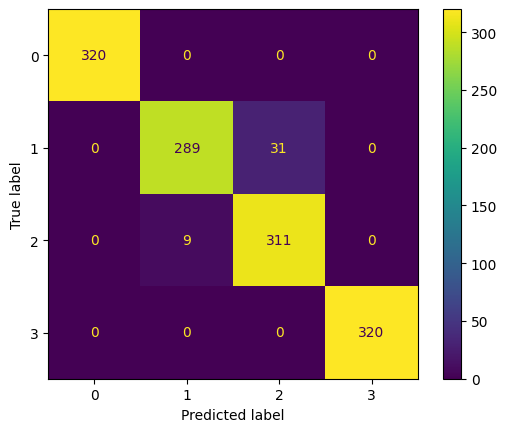

In [151]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()